In [1]:
pwd

'/Users/grizzlystudio/Library/Mobile Documents/com~apple~CloudDocs/Download_ALL_Apple/github/2024-NT-Python-and-PowerBI/dev'

In [2]:
! ls -l ../data/

total 2265936
-rw-r--r--  1 grizzlystudio  staff  1160157683 Mar 23  2023 LoanStats_web.csv


In [3]:
! head -10 ../data/*.csv

"id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","url","desc","purpose","title","zip_code","addr_state","dti","delinq_2yrs","earliest_cr_line","inq_last_6mths","mths_since_last_delinq","mths_since_last_record","open_acc","pub_rec","revol_bal","revol_util","total_acc","initial_list_status","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","collections_12_mths_ex_med","mths_since_last_major_derog","policy_code","application_type","annual_inc_joint","dti_joint","verification_status_joint","acc_now_delinq","tot_coll_amt","tot_cur_bal","open_acc_6m","open_act_il","open_il_12m","open_il_24m","mths_since_rcnt_il","total_bal_il","il_util","open_rv_1

In [4]:
### https://chat.openai.com/share/d835f292-f1f2-4eeb-85c5-6e437210298e

import pandas as pd

# Assuming `data.csv` is your file name
df = pd.read_csv('../data/LoanStats_web.csv', dtype=str)

In [5]:
# Calculate the percentage of missing values for each column
missing_percentage = df.isnull().mean() * 100

# Filter out columns where more than 30% of the data is missing
columns_to_keep = missing_percentage[missing_percentage <= 30].index.tolist()
filtered_df = df[columns_to_keep]

# If you need to check the resulting DataFrame or save it to a new file
print(filtered_df.head())  # To display the first few rows of the filtered DataFrame
filtered_df.to_csv('filtered_loanstats_web.csv', index=False)  # To save the filtered DataFrame to a new CSV file

  loan_amnt funded_amnt funded_amnt_inv        term int_rate installment  \
0     12800       12800           12800   36 months   11.99%      425.09   
1      9000        9000            9000   36 months   15.31%      313.36   
2      8000        8000            8000   36 months   10.75%      260.97   
3     25000       25000           25000   60 months   12.99%       568.7   
4     35000       35000           35000   60 months   18.25%      893.54   

  grade sub_grade              emp_title emp_length  ... pct_tl_nvr_dlq  \
0     C        C1  LOGISTICS COORDINATOR    6 years  ...            100   
1     C        C5  Senior Case Assistant    9 years  ...           92.3   
2     B        B4                     Vp    5 years  ...            100   
3     C        C2         Administration  10+ years  ...            100   
4     D        D3           Electrician   10+ years  ...            100   

  percent_bc_gt_75 pub_rec_bankruptcies tax_liens tot_hi_cred_lim  \
0              100     

In [6]:
#filtered_df['funded_amnt'].isnull().value_counts()

In [7]:
#! pip install numpy scipy

In [8]:
df = filtered_df

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1432466 entries, 0 to 1432465
Data columns (total 100 columns):
 #   Column                      Non-Null Count    Dtype 
---  ------                      --------------    ----- 
 0   loan_amnt                   1432440 non-null  object
 1   funded_amnt                 1432440 non-null  object
 2   funded_amnt_inv             1432440 non-null  object
 3   term                        1432440 non-null  object
 4   int_rate                    1432440 non-null  object
 5   installment                 1432440 non-null  object
 6   grade                       1432440 non-null  object
 7   sub_grade                   1432440 non-null  object
 8   emp_title                   1302202 non-null  object
 9   emp_length                  1323970 non-null  object
 10  home_ownership              1432440 non-null  object
 11  annual_inc                  1432440 non-null  object
 12  verification_status         1432440 non-null  object
 13  issue_d    

### คำถาม: ในข้อมูลนี้เป็นลูกค้าที่ได้รับเงินกู้ทั้งหมด อยากทราบว่า การระบุ title หรือ ไม่ระบุ มีความสัมพันธ์กับจำนวนเงินกู้หรือไม่ มากน้อยแค่ไหน

In [10]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu

# โหลดข้อมูล (สมมติฐาน)
# df = pd.read_csv('path_to_your_file.csv')

# สร้างสำเนาเพื่อหลีกเลี่ยง SettingWithCopyWarning
df_clean = df.copy()

# ลบแถวที่ 'funded_amnt' เป็น NaN
df_clean = df_clean.dropna(subset=['funded_amnt'])

# แปลงคอลัมน์ 'funded_amnt' ให้เป็นชนิดข้อมูลตัวเลขโดยใช้ pd.to_numeric() 
# และจัดการกับค่าที่ไม่สามารถแปลงเป็นตัวเลขได้ โดยการแปลงค่าเหล่านั้นให้กลายเป็น NaN
### df_clean['funded_amnt'] = pd.to_numeric(df_clean['funded_amnt'], errors='coerce')

# แยกข้อมูลเป็นสองกลุ่ม: 'title' เป็น null และไม่เป็น null
funded_amnt_null = df_clean[df_clean['title'].isnull()]['funded_amnt']
funded_amnt_notnull = df_clean[df_clean['title'].notnull()]['funded_amnt']

# แปลงชนิดข้อมูลเป็นตัวเลขและลบค่า NaN
funded_amnt_null = pd.to_numeric(funded_amnt_null, errors='coerce').dropna()
funded_amnt_notnull = pd.to_numeric(funded_amnt_notnull, errors='coerce').dropna()

# ทำการทดสอบ Mann-Whitney U
stat, p = mannwhitneyu(funded_amnt_null, funded_amnt_notnull, alternative='two-sided')

print('Statistics=%.3f, p=%.3f' % (stat, p))

# ตีความผลลัพธ์
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')


Statistics=16183738994.000, p=0.020
Different distribution (reject H0)


In [11]:
funded_amnt_null

16        18000
49        12000
70         5800
73         5200
88        16550
          ...  
330857    28600
430327     6875
432162    20075
434410    40000
434412    14000
Name: funded_amnt, Length: 23173, dtype: int64

In [12]:
funded_amnt_notnull

0          12800
1           9000
2           8000
3          25000
4          35000
           ...  
1432459     5000
1432460     6000
1432461    16000
1432462    16000
1432463    29250
Name: funded_amnt, Length: 1409267, dtype: int64

In [13]:
#! pip install seaborn

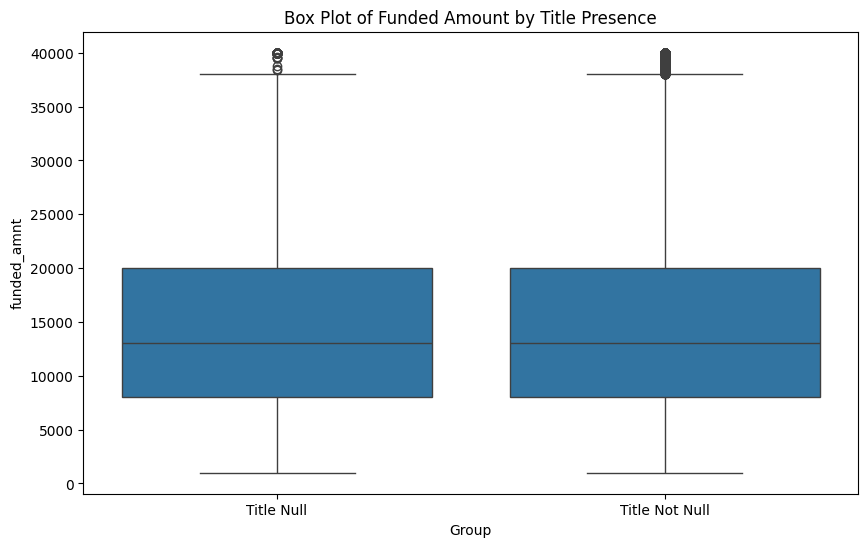

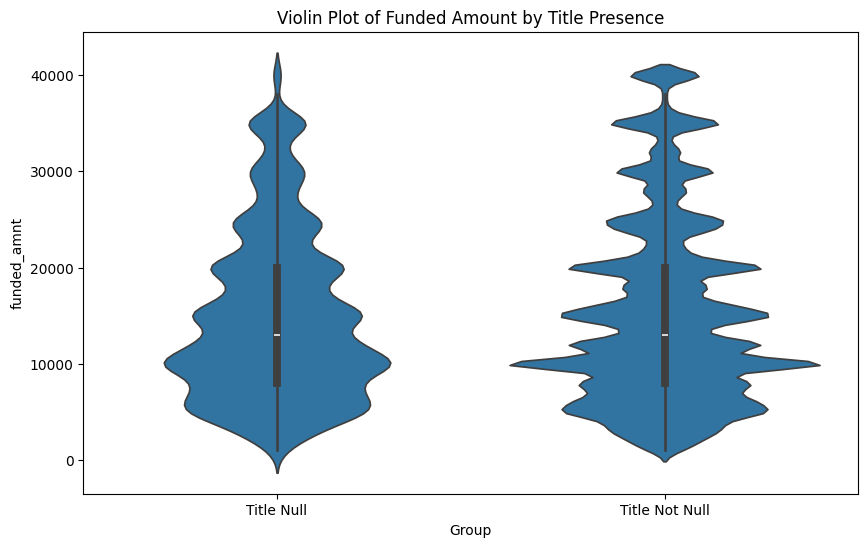

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# สร้าง DataFrame เพื่อการแสดงผล
plot_data = pd.DataFrame({
    'funded_amnt': pd.concat([funded_amnt_null, funded_amnt_notnull]),
    'Group': ['Title Null']*len(funded_amnt_null) + ['Title Not Null']*len(funded_amnt_notnull)
})

# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Group', y='funded_amnt', data=plot_data)
plt.title('Box Plot of Funded Amount by Title Presence')
plt.show()

# Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Group', y='funded_amnt', data=plot_data)
plt.title('Violin Plot of Funded Amount by Title Presence')
plt.show()
